In [34]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [4]:
raw_data = pd.read_csv("epi_r.csv")
print(raw_data.shape)
raw_data.head()

(20052, 680)


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
raw_data["rating"].describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

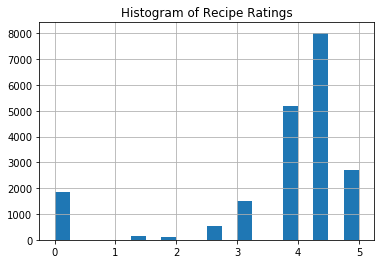

In [6]:
raw_data["rating"].hist(bins=20)
plt.title("Histogram of Recipe Ratings")
plt.show()

In [7]:
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
start_time = time.time()
svr = SVR()
X = raw_data.drop(["rating", "title", "calories", "protein", "fat", "sodium"], axis=1)
y = raw_data["rating"]
svr.fit(X, y)
total_time = time.time() - start_time
print(svr.score(X, y))
print("----- {:.6f} -----".format(total_time))

0.03856570651298896
----- 360.524498 -----


In [9]:
start_time = time.time()
scores = cross_val_score(svr, X, y, cv=5, n_jobs=-1)
total_time = time.time() - start_time
print(scores)
print("----- {:.6f} -----".format(total_time))

[0.01818511 0.026411   0.03037705 0.01957949 0.02451197]
----- 314.790245 -----


In [14]:
np.max(scores) - np.min(scores)

0.012191942855399929

## Challenge starts here...

In [15]:
raw_data["rating"].value_counts(normalize=True)

4.375    0.399910
3.750    0.257780
5.000    0.135597
0.000    0.091562
3.125    0.074257
2.500    0.026531
1.250    0.008179
1.875    0.006184
Name: rating, dtype: float64

In [16]:
raw_data["rating_gt_four"] = raw_data["rating"].apply(lambda x: 1 if x > 4 else 0)

In [17]:
raw_data["rating_gt_four"].value_counts(normalize=True)

1    0.535508
0    0.464492
Name: rating_gt_four, dtype: float64

## Top 30 features by filtering method
Top 30 features by corr with target variable

In [18]:
corr_mat = raw_data.corr()
corr_mat

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating_gt_four
rating,1.000000,0.007882,0.013980,0.007236,0.008177,0.003147,0.006771,0.011155,-0.047840,0.006717,...,-0.023807,0.006771,0.007179,0.002294,-0.009179,-0.051770,-0.037606,-0.006739,0.022599,0.655698
calories,0.007882,1.000000,0.742816,0.996538,0.996392,-0.000208,-0.000135,-0.000470,-0.000582,-0.000306,...,-0.002484,-0.000134,-0.000290,-0.001970,-0.000180,-0.000283,-0.000616,-0.000484,-0.002255,0.012585
protein,0.013980,0.742816,1.000000,0.712194,0.749287,-0.000323,-0.000201,-0.000464,-0.000756,-0.000257,...,-0.003113,-0.000197,-0.000354,-0.002561,-0.000231,-0.000289,-0.000882,-0.000701,-0.000742,0.015498
fat,0.007236,0.996538,0.712194,1.000000,0.986476,-0.000215,-0.000132,-0.000454,-0.000559,-0.000289,...,-0.002387,-0.000132,-0.000289,-0.001894,-0.000174,-0.000277,-0.000594,-0.000464,-0.002215,0.012018
sodium,0.008177,0.996392,0.749287,0.986476,1.000000,-0.000273,-0.000143,-0.000444,-0.000594,-0.000307,...,-0.002606,-0.000137,-0.000301,-0.002023,-0.000172,-0.000286,-0.000635,-0.000506,-0.001856,0.012702
#cakeweek,0.003147,-0.000208,-0.000323,-0.000215,-0.000273,1.000000,-0.000122,-0.000504,-0.000635,-0.000323,...,-0.002845,-0.000122,-0.000299,-0.002125,-0.000212,-0.000323,-0.000647,-0.000533,-0.002639,-0.007013
#wasteless,0.006771,-0.000135,-0.000201,-0.000132,-0.000143,-0.000122,1.000000,-0.000206,-0.000259,-0.000132,...,-0.001161,-0.000050,-0.000122,-0.000867,-0.000086,-0.000132,-0.000264,-0.000217,-0.001077,0.006577
22-minute meals,0.011155,-0.000470,-0.000464,-0.000454,-0.000444,-0.000504,-0.000206,1.000000,-0.001070,0.091180,...,0.005911,-0.000206,-0.000504,0.010584,-0.000356,0.091180,-0.001089,-0.000897,0.007050,0.016822
3-ingredient recipes,-0.047840,-0.000582,-0.000756,-0.000559,-0.000594,-0.000635,-0.000259,-0.001070,1.000000,-0.000686,...,0.002455,-0.000259,-0.000635,-0.004510,-0.000449,-0.000686,0.035047,-0.001131,0.003521,-0.025792
30 days of groceries,0.006717,-0.000306,-0.000257,-0.000289,-0.000307,-0.000323,-0.000132,0.091180,-0.000686,1.000000,...,-0.003073,-0.000132,-0.000323,-0.002295,-0.000229,-0.000349,-0.000699,-0.000576,-0.002851,0.001346


In [19]:
corr_mat["abs_rating_corr"] =corr_mat["rating_gt_four"].apply(lambda x: np.abs(x))

In [20]:
corr_mat["abs_rating_corr"].drop("rating").sort_values(ascending=False).head(31)

rating_gt_four       1.000000
bon appétit          0.097076
house & garden       0.092801
drink                0.083065
alcoholic            0.077158
gin                  0.071066
roast                0.068198
thanksgiving         0.067094
peanut free          0.065897
soy free             0.065799
cocktail party       0.063534
dinner               0.062186
spirit               0.057028
christmas            0.054409
bitters              0.052951
grill/barbecue       0.051204
low fat              0.049230
tree nut free        0.047943
backyard bbq         0.047682
fall                 0.046565
cocktail             0.045829
pasta                0.043092
grill                0.042924
stuffing/dressing    0.042454
harpercollins        0.042345
rum                  0.041792
goat cheese          0.041207
vegan                0.039458
stir-fry             0.038336
father's day         0.036564
dessert              0.036225
Name: abs_rating_corr, dtype: float64

In [21]:
a = list(corr_mat["abs_rating_corr"].drop("rating").sort_values(ascending=False).head(31).index)
df_by_corr = raw_data[a]
print("Rows: {}\nColumns: {}".format(df_by_corr.shape[0], df_by_corr.shape[1]))
df_by_corr.head()

Rows: 20052
Columns: 31


,rating_gt_four,bon appétit,house & garden,drink,alcoholic,gin,roast,thanksgiving,peanut free,soy free,...,pasta,grill,stuffing/dressing,harpercollins,rum,goat cheese,vegan,stir-fry,father's day,dessert
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_by_corr.isnull().sum()

rating_gt_four       0
bon appétit          0
house & garden       0
drink                0
alcoholic            0
gin                  0
roast                0
thanksgiving         0
peanut free          0
soy free             0
cocktail party       0
dinner               0
spirit               0
christmas            0
bitters              0
grill/barbecue       0
low fat              0
tree nut free        0
backyard bbq         0
fall                 0
cocktail             0
pasta                0
grill                0
stuffing/dressing    0
harpercollins        0
rum                  0
goat cheese          0
vegan                0
stir-fry             0
father's day         0
dessert              0
dtype: int64

In [23]:
X = df_by_corr.drop("rating_gt_four", axis=1)
y = df_by_corr["rating_gt_four"]

In [24]:
start_time = time.time()
svm = SVC()
svm.fit(X, y)
total_time = time.time() - start_time
print("----- {:.6f} -----".format(total_time))

----- 24.689951 -----


In [25]:
start_time = time.time()
print(svm.score(X, y))
total_time = time.time() - start_time
print("----- {:.6f} -----".format(total_time))

0.5757031717534411
----- 15.843973 -----


In [26]:
start_time = time.time()
svc_scores = cross_val_score(svm, X, y, cv=5, n_jobs=-1)
total_time = time.time() - start_time
print(svc_scores)
print("----- {:.6f} -----".format(total_time))

[0.56070805 0.57342309 0.57417103 0.57481297 0.57944625]
----- 32.979017 -----


In [27]:
np.mean(svc_scores)

0.5725122765125642

In [28]:
np.max(svc_scores) - np.min(svc_scores)

0.018738193091970334

In [31]:
start_time = time.time()
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{"svc__C": param_range,
               "svc__kernel": ["linear"]}]
svc_pipe = Pipeline([("svc", SVC())])
gs = GridSearchCV(estimator=svc_pipe,
                 param_grid=param_grid,
                 scoring="accuracy",
                 cv=5,
                 n_jobs=-1)
gs.fit(X, y)
total_time = time.time() - start_time
print(gs.best_score_)
print(gs.best_params_)
print("----- {:.6f} -----".format(total_time))

0.5674246957909436
{'svc__C': 10.0, 'svc__kernel': 'linear'}
----- 400.289720 -----


In [32]:
start_time = time.time()
best_svc = gs.best_estimator_
best_svc_scores = cross_val_score(best_svc, X, y, cv=5, n_jobs=-1)
total_time = time.time() - start_time
print("----- {:.6f} -----".format(total_time))

----- 30.514011 -----


In [33]:
print("cross_val_scores: ", best_svc_scores)
print("mean: ", np.mean(best_svc_scores))
print("range: ", np.max(best_svc_scores) - np.min(best_svc_scores))

cross_val_scores:  [0.55646971 0.56369983 0.56993269 0.57206983 0.57495635]
mean:  0.5674256785101904
range:  0.01848663991434385
